# Bone marrow tissue segmentation

Teophile Lemay, 2022-06

this notebook has my experimentation for bone marrow tissue segmentation using images from the lab of dr Huber Tsui
working with Katelyn wang on the segmentation

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import skimage.io as io
import fluorescence_functions as fl
from skimage.filters.rank import entropy
from skimage.morphology import disk

In [ ]:
path = r'images\LARGE_IMAGE-T23-B13-7359_22528_10240_20.0X.tif'
im = io.imread(path)
gim = cv.cvtColor(im[:, :, ::-1], cv.COLOR_BGR2GRAY)

plt.figure(figsize=(6,6))
plt.imshow(im)
# plt.figure(figsize=(10,10))
# plt.imshow(gim, 'gray')
plt.show()

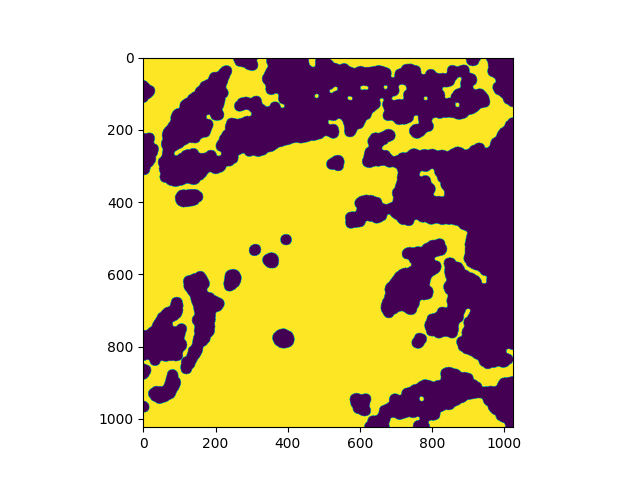

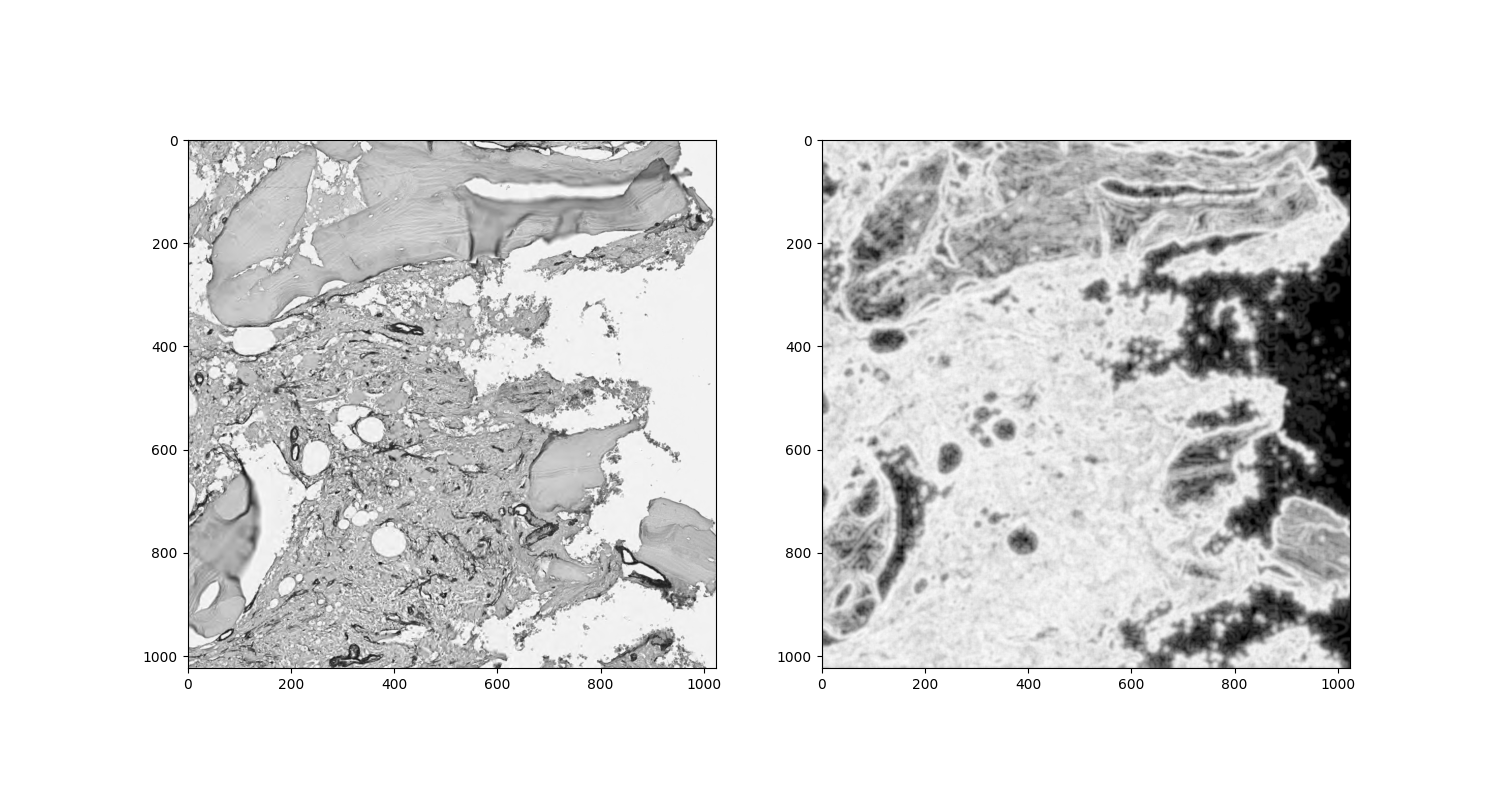

In [ ]:
ent = entropy(gim, disk(5))
binmap = np.ones(ent.shape, dtype=np.uint8)
binmap[ent < 5] = 0
open = cv.morphologyEx(binmap, cv.MORPH_OPEN, disk(5))
closed = cv.morphologyEx(open, cv.MORPH_CLOSE, disk(15))

plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
plt.imshow(gim, 'gray')
plt.subplot(1, 2, 2)
plt.imshow(ent, 'gray')
plt.figure()
plt.imshow(closed)
plt.show()


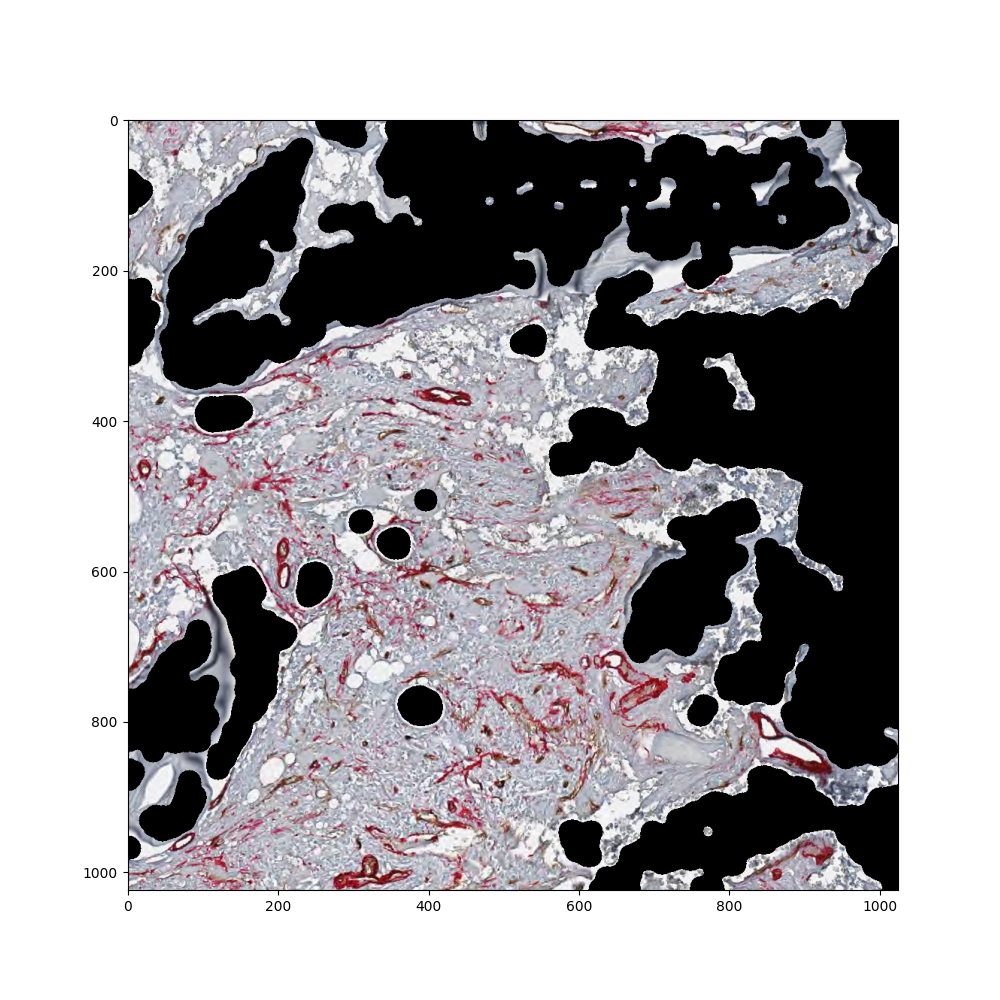

In [ ]:
tissue = im * np.atleast_3d(closed)
plt.figure(figsize=(10,10))
plt.imshow(tissue)
plt.show()